<a href="https://colab.research.google.com/github/phsok10/Aiffel/blob/main/%5BE05%5Dscissor_rock_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploration 5 가위바위보**

사용할 라이브러리 도입

In [5]:
import tensorflow as tf
import numpy as np
import os
print(tf.__version__)
print(np.__version__)

2.8.0
1.21.6


In [6]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


**데이터 준비**

데이터 불러오기 및 Resize하기

In [8]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈변환 후 저장
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [11]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈변환 후 저장
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [12]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈변환 후 저장
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


**데이터 라벨링**

In [13]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  2


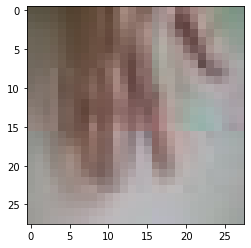

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[200])
print('라벨: ', y_train[200])

**딥러닝 네트워크 설계**

모델을 학습하고 테스트한 결과 모델의 구조를 변경해야 할 필요성이 있어

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (No

**딥러닝 네트워크 학습시키기**

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 1s 20ms/step - loss: 1.2659 - accuracy: 0.6167
Epoch 2/20
10/10 [==============================] - 0s 21ms/step - loss: 0.5578 - accuracy: 0.7700
Epoch 3/20
10/10 [==============================] - 0s 21ms/step - loss: 0.3927 - accuracy: 0.8633
Epoch 4/20
10/10 [==============================] - 0s 20ms/step - loss: 0.2615 - accuracy: 0.9067
Epoch 5/20
10/10 [==============================] - 0s 21ms/step - loss: 0.1818 - accuracy: 0.9467
Epoch 6/20
10/10 [==============================] - 0s 21ms/step - loss: 0.1671 - accuracy: 0.9400
Epoch 7/20
10/10 [==============================] - 0s 20ms/step - loss: 0.1068 - accuracy: 0.9800
Epoch 8/20
10/10 [==============================] - 0s 20ms/step - loss: 0.0956 - accuracy: 0.9800
Epoch 9/20
10/10 [==============================] - 0s 20ms/step - loss: 0.0851 - accuracy: 0.9833
Epoch 10/20
10/10 [==============================] - 0s 21ms/step - loss: 0.0482 - accuracy: 0.9967
Epoch 11/

**딥러닝 네트워크 성능 테스트**

테스트용 이미지는 각 200개씩 총 600개의 이미지 사용

In [18]:

	
#  이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈 조정
image_dir_path =  "/content/drive/MyDrive/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path =  "/content/drive/MyDrive/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합이 600개로 변함에 따라 조정
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))     

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


**딥러닝 네트워크의 Accuracy 확인**

In [21]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 7.7830 - accuracy: 0.5100 - 239ms/epoch - 13ms/step
test_loss: 7.783040523529053 
test_accuracy: 0.5099999904632568


**고찰**

1. 손가락 모양의 복잡성에 비해 Resize한 이미지의 정보가 적어서인지 Accuracy가 낮게 나옴.
2. Accuracy를 높히기 위해 모델의 Conv2D 레이어의 이미지 특징의 수를 16과 32에서 각각 32와 64로 증대시켰더니 Accuracy가 높아짐.
3. 손의 배경색과의 연관성을 확인해 볼 필요가 있음
4. 모델의 정확성을 높히기 위해 아래의 사항들을 추 후 고민 할 예정임
4-1 레이어의 변화
4-2 이미지 특성 수 변화
4-2 다양한 배경의 Train Data확보